In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
신용=pd.read_csv('data/신용.csv')

In [3]:
신용.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [4]:
del 신용['fea_2']

In [5]:
del 신용['id']

# 0 : 낮은 신용 위험, 1: 높은 신용 위험

In [6]:
신용

,label,fea_1,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,4,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,7,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,7,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...
1120,0,5,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,5,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,7,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,4,3,137000.0,2,8,5,90,5,72000,1.000000


In [7]:
신용.groupby('label').size()

label
0    900
1    225
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


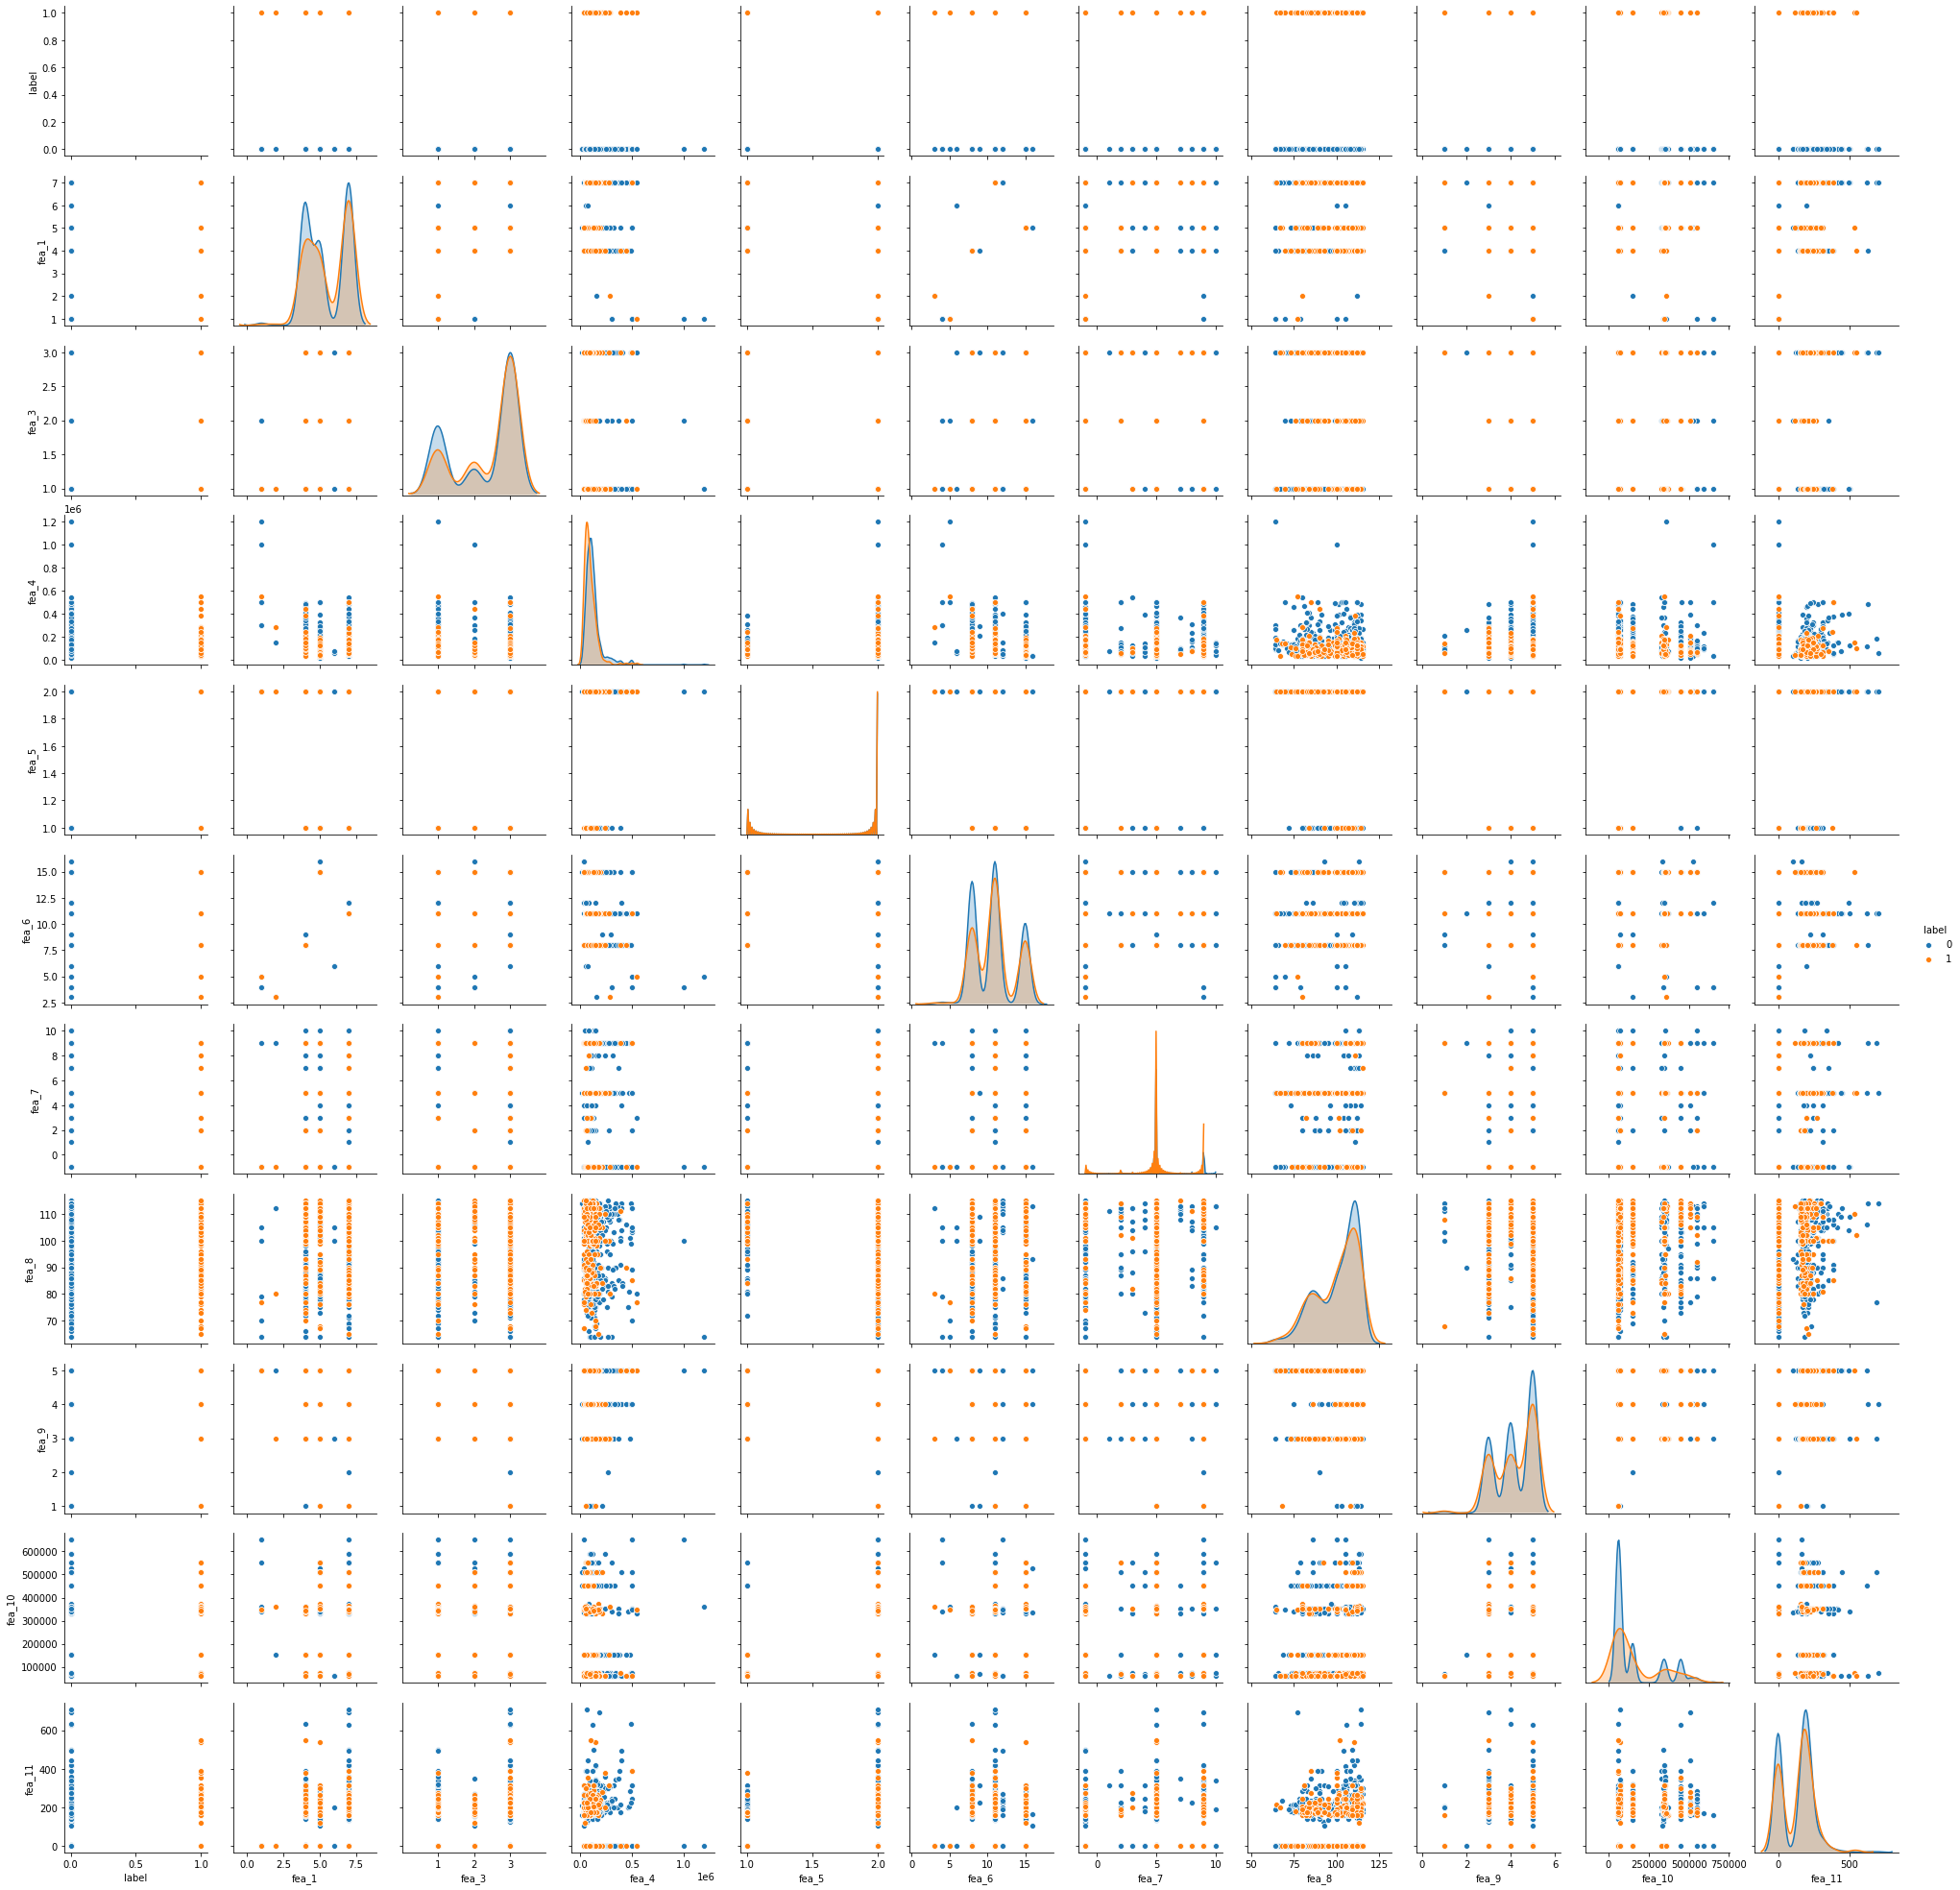

In [8]:
sns.pairplot(신용, hue='label')

In [9]:
신용.corr()

,label,fea_1,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
label,1.000000e+00,0.052071,0.055658,-0.131459,0.017293,0.028907,-0.012271,-0.021251,1.570103e-16,0.000881,0.002444
fea_1,5.207118e-02,1.000000,0.004391,-0.105110,-0.020977,0.346629,-0.030144,0.049951,-5.500809e-02,0.108505,0.095053
fea_3,5.565787e-02,0.004391,1.000000,-0.119909,-0.017062,0.161899,0.253059,0.025249,1.285708e-01,-0.117266,0.066774
fea_4,-1.314593e-01,-0.105110,-0.119909,1.000000,0.035862,-0.137654,-0.046294,-0.105451,1.000482e-01,0.066553,0.039042
fea_5,1.729286e-02,-0.020977,-0.017062,0.035862,1.000000,0.055280,-0.017898,0.003813,-2.165627e-02,0.105127,-0.101328
fea_6,2.890698e-02,0.346629,0.161899,-0.137654,0.055280,1.000000,-0.010971,0.028963,6.183006e-02,0.216362,0.128467
fea_7,-1.227143e-02,-0.030144,0.253059,-0.046294,-0.017898,-0.010971,1.000000,0.078722,-1.652961e-02,-0.245453,0.021797
fea_8,-2.125122e-02,0.049951,0.025249,-0.105451,0.003813,0.028963,0.078722,1.000000,-1.009981e-01,0.095880,0.133031
fea_9,1.570103e-16,-0.055008,0.128571,0.100048,-0.021656,0.061830,-0.016530,-0.100998,1.000000e+00,-0.038176,-0.048769
fea_10,8.808212e-04,0.108505,-0.117266,0.066553,0.105127,0.216362,-0.245453,0.095880,-3.817559e-02,1.000000,0.271108


In [10]:
신용.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 11 columns):
label     1125 non-null int64
fea_1     1125 non-null int64
fea_3     1125 non-null int64
fea_4     1125 non-null float64
fea_5     1125 non-null int64
fea_6     1125 non-null int64
fea_7     1125 non-null int64
fea_8     1125 non-null int64
fea_9     1125 non-null int64
fea_10    1125 non-null int64
fea_11    1125 non-null float64
dtypes: float64(2), int64(9)
memory usage: 96.8 KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

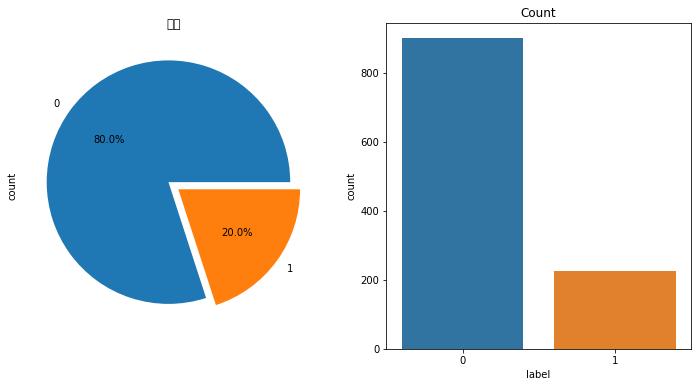

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,6))

신용['label'].value_counts().plot.pie(ax=ax[0],explode=(0.05, 0.05),autopct='%1.1f%%')
ax[0].set_title('등급')
ax[0].set_ylabel('count')

sns.countplot('label', data=신용,ax=ax[1])
ax[1].set_title('Count')
plt.show()

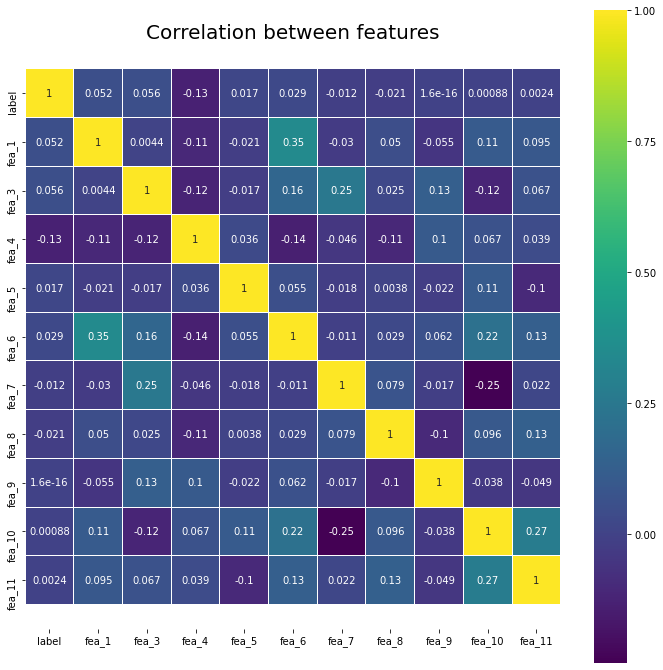

In [12]:
plt.figure(figsize=(12, 12))
ax=sns.heatmap(신용.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

## 신용 위험도(label) 와 관련있는 컬럼 : fea_1,fea_3,fea_5,6,11

In [13]:
y = 신용.loc[:,'label']
x = 신용.loc[:,['fea_1','fea_3','fea_5','fea_6','fea_11']]

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)

In [15]:
svc=SVC() #svc
knn = KNeighborsClassifier(n_neighbors=3) # KNN
tree=DecisionTreeClassifier(max_depth=8, random_state=20) # Tree
forest= RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456) # Forest

In [16]:
scores = cross_val_score(svc, x_train, y_train, cv=10)
scores2 = cross_val_score(knn, x_train, y_train, cv=10)
scores3 = cross_val_score(tree, x_train, y_train, cv=10) 
scores4 = cross_val_score(forest, x_train, y_train, cv=10) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [17]:
scores.mean() # svc 수치가 제일 높음

0.7955555555555556

In [18]:
scores2.mean() #8 knn

0.7444444444444445

In [19]:
scores3.mean() # tree

0.7766666666666667

In [20]:
scores4.mean() # forest

0.7533333333333333

In [21]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [22]:
values = [0.0001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'kernel':['rbf'], 'C':values, 'gamma':values},
               {'kernel':['linear'], 'C':values}]

In [23]:
grid_search = GridSearchCV(svc, param_grid,cv=5)

In [24]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
grid_search.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [26]:
grid_search.best_score_

0.8011111111111111

In [27]:
grid_search.score(x_test,y_test)

0.8

In [29]:
svc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred=svc.predict(x_test)

In [31]:
print(accuracy_score(y_test, y_pred))

0.8


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       180
           1       0.50      0.04      0.08        45

    accuracy                           0.80       225
   macro avg       0.65      0.52      0.48       225
weighted avg       0.74      0.80      0.73       225

